In [7]:
import numpy as np
import glob
import matplotlib.pyplot as plt

name_file = "stuffed_toys_ms"


images = glob.glob(f'{name_file}/*.png')
images.sort()

for i in range(len(images)):
    img = plt.imread(images[i])
    if i == 0:
        stacked = img
    else:
        stacked = np.dstack((stacked,img))

stacked.shape

(512, 512, 31)

In [8]:
from spec2rgb import COLOR_SPACE
print("Allowed color spaces", list(COLOR_SPACE.keys()))

Allowed color spaces ['sRGB', 'AdobeRGB', 'AppleRGB', 'UHDTV', 'CIERGB']


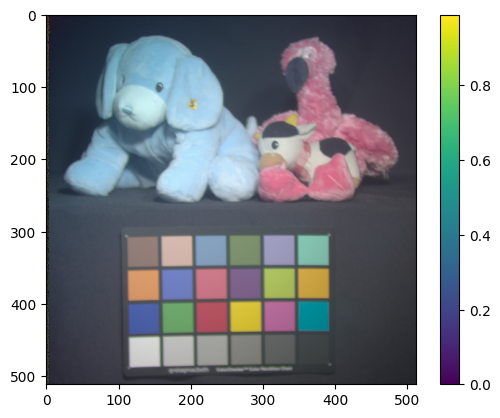

In [9]:
from spec2rgb import ColourSystem

color_space = "sRGB"
start, end = 400, 700 
number_bands = 31

cs = ColourSystem(cs=color_space, start=start, end=end, num=number_bands)

img_rgb = cs.spec_to_rgb(stacked)

img_rgb = np.clip(img_rgb, 0, 1)

#post processing, because the image is too dark
img_rgb = img_rgb ** 0.3

plt.imshow(img_rgb)
plt.colorbar()
plt.show()

In [10]:
plt.imsave(f'created_images_rgb/{name_file}.png', img_rgb)

send image to model in hugginface with transformers library

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nelso\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see acti

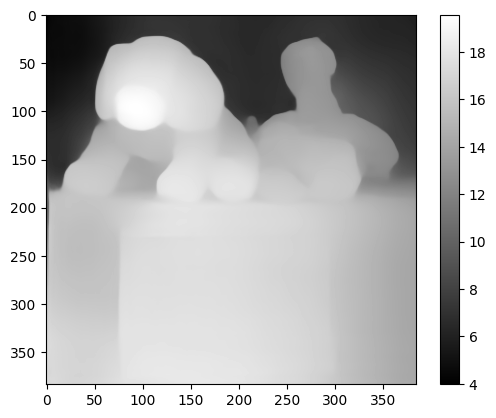

In [13]:
from transformers import pipeline
from PIL import Image

estimator = pipeline(task="depth-estimation", model="Intel/dpt-large")

img_rgb = Image.fromarray((img_rgb * 255).astype(np.uint8))

result = estimator(images = img_rgb)

plt.imshow(result["predicted_depth"].squeeze(), cmap="gray")
plt.colorbar()

post-processing

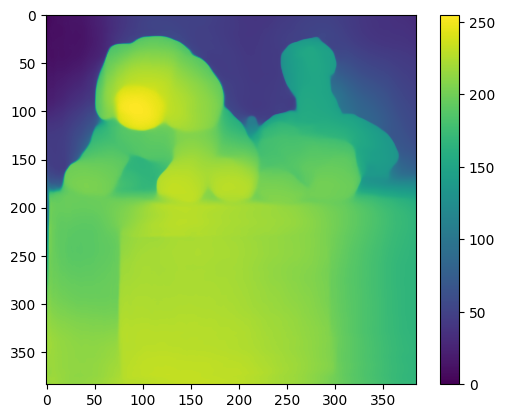

In [18]:
max_val = (2 ** (8 * 1)) - 1

result_ = max_val * (result["predicted_depth"].squeeze() - result["predicted_depth"].min()) / (result["predicted_depth"].max() - result["predicted_depth"].min())

plt.imshow(result_)
plt.colorbar()

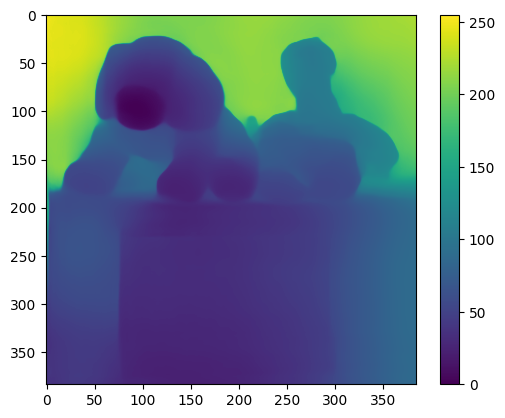

In [21]:
plt.imshow( ( 255-result_ ) + result_.min() )
plt.colorbar()